In [99]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from prettytable import PrettyTable
from sklearn.metrics import precision_recall_fscore_support

In [100]:
# Lendo dados para tarefa 1
data = np.fromfile('dataAll.txt')

In [101]:
# Dividindo a entra em 3 variáveis x1, x2 e yd respectivamente. X contém um array 2d para facilitar o uso durante os processamentos 
x1, x2, yd = data[::3], data[1::3], data[2::3]
X = np.column_stack((x1, x2))

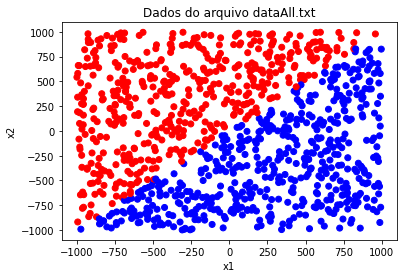

In [102]:
# Plotando os pontos da base de dados no gráfico. Observa-se que o problema é linearmente separável.
colors = ['blue' if item else 'red' for item in yd]
plt.scatter(x1, x2, c=colors)
plt.title('Dados do arquivo dataAll.txt')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [106]:
# Classe Perceptron para simplificação do código durante a solução do problema
class Perceptron:
    def __init__(self, learning_rate=0.1, minI=-0.5, maxI=0.5, input_size=2, epochs=None, enable_logging=False):
        self.learning_rate = learning_rate
        self.bias = 0
        self.weights = np.random.uniform(low=minI, high=maxI, size=input_size)
        self.epochs = 0 if epochs is None else epochs
        self.weight_updates = []
        self.enable_logging = enable_logging

    # Função de log
    def log(self, message):
        if self.enable_logging:
            print(message)

    # Função de ativação: degrau unitário
    def unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    # Processamento do neurônio
    def neuron_output(self, Xi):
        return self.unit_step_func(np.dot(self.weights, Xi) + self.bias)

    # Treinamento do neurônio. Para genrealização do método, o atributo
    # self.epochs dita se o treino rodará até a convergência ou se até 
    # o número de épocas indicado
    def train_neuron(self, X, yd):    
        self.log(f'Vetor de pesos inicial: {self.weights}')
        n_samples = X.shape
        
        # Caso haja uma inicialização do atributo self.epochs diferente de zero
        # o algoritmo treinará o neurônio por self.epochs épocas
        if self.epochs:
            data = X.copy()
            for idx in range(epochs):
                # Randomizando a base de treino
                np.random.shuffle(data)
                errors = 0
                
                for idx, Xi in enumerate(data):
                    y_predicted = self.neuron_output(Xi)

                    update = self.learning_rate * (yd[idx] - y_predicted)
                    errors += int(update != 0.0)

                    self.weights += update * Xi
                    self.bias += update

                self.weight_updates.append(errors)
        # Caso o valor de self.epochs seja zero, o algoritmo tentará atingir a convergência
        else:
            while True:
                self.epochs += 1
                errors = 0
                
                for idx, Xi in enumerate(X):
                    y_predicted = self.neuron_output(Xi)

                    update = self.learning_rate * (yd[idx] - y_predicted)
                    errors += int(update != 0.0)

                    self.weights += update * Xi
                    self.bias += update

                    if update:
                        self.log(f'Novo vetor de pesos: {self.weights}')

                self.log(f'Número de ajustes no vetor de pesos ao fim da epoca: {errors}')
                self.weight_updates.append(errors)

                if errors == 0:
                    break

        return self.weights, self.bias, self.epochs, self.weight_updates

    # Processamento da predição
    def predict(self, X):
        y_pred = [self.neuron_output(Xi) for Xi in X]
        return np.array(y_pred)

In [107]:
# Inicialização e treino (até convergência) do perceptron
p = Perceptron(enable_logging=True)
weights, bias, epochs, weight_updates = p.train_neuron(X, yd)

print()
print(f'Número total de ajustes: {sum(weight_updates)}')
print(f'Número épocas até convergência: {epochs}')

Vetor de pesos inicial: [-0.30534244 -0.15270153]
Novo vetor de pesos: [ 36.07349756 -24.56693153]
Novo vetor de pesos: [ -17.58555244 -101.06268153]
Novo vetor de pesos: [ 55.21046756 -65.23312153]
Novo vetor de pesos: [137.80916756  14.62270847]
Novo vetor de pesos: [143.65492756 -63.67188153]
Novo vetor de pesos: [ 103.64601756 -141.56457153]
Novo vetor de pesos: [157.31582756 -92.47230153]
Novo vetor de pesos: [ 104.35576756 -149.34176153]
Novo vetor de pesos: [163.91528756 -99.21943153]
Novo vetor de pesos: [ 118.39065756 -164.85536153]
Novo vetor de pesos: [209.10651756 -90.14204153]
Novo vetor de pesos: [ 151.32552756 -150.45019153]
Novo vetor de pesos: [ 103.05896756 -198.91991153]
Novo vetor de pesos: [ 173.50631756 -156.80364153]
Novo vetor de pesos: [ 126.66431756 -208.21351153]
Novo vetor de pesos: [ 196.52794756 -143.99457153]
Novo vetor de pesos: [ 140.69221756 -200.17210153]
Novo vetor de pesos: [ 217.67968756 -135.32277153]
Novo vetor de pesos: [ 181.40964756 -178.55081

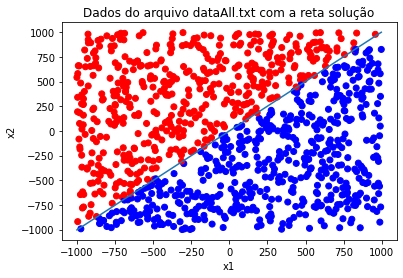

In [108]:
# Plotando gráfico com as entradas do problema divididos pela reta solução
slope = - weights[0] / weights[1]
x2cut = -bias / weights[1]

min_ = x1.min()
max_ = x1.max()

a = [min_, max_]
b = [slope*min_+x2cut, slope*max_+x2cut]

plt.scatter(x1, x2, c=colors)
plt.plot(a, b)
plt.title('Dados do arquivo dataAll.txt com a reta solução')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [109]:
# Lendo dados para tarefa 2. O arquivo escolhido foi o 3, dado a matrícula do aluno (1515080197)
# e resto de divisão do último dígito (7) por 4 resultando.
data = np.fromfile('data3.txt')

In [110]:
# Dividindo a entra em 3 variáveis x1, x2 e yd respectivamente. X contém um array 2d para facilitar o uso durante os processamentos
x1, x2, yd = data[::3], data[1::3], data[2::3]
X = np.column_stack((x1, x2))

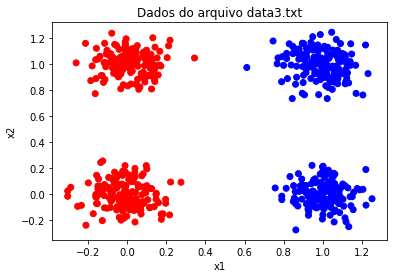

In [111]:
# Plotando os pontos da base de dados no gráfico. Observa-se que o problema é linearmente separável.
colors = ['blue' if item else 'red' for item in yd]
plt.scatter(x1, x2, c=colors)
plt.title('Dados do arquivo data3.txt')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

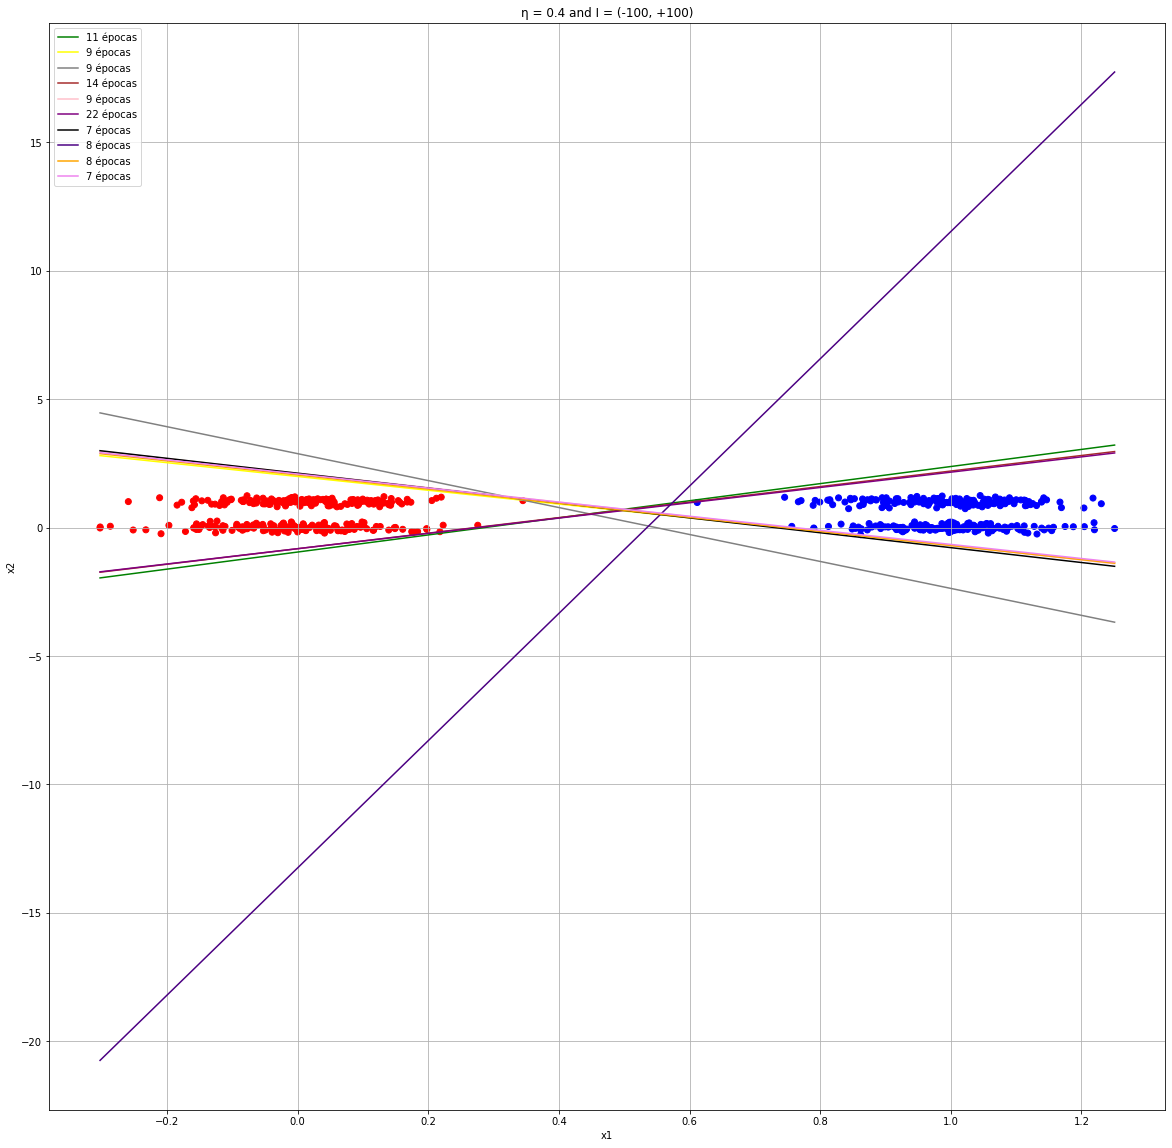

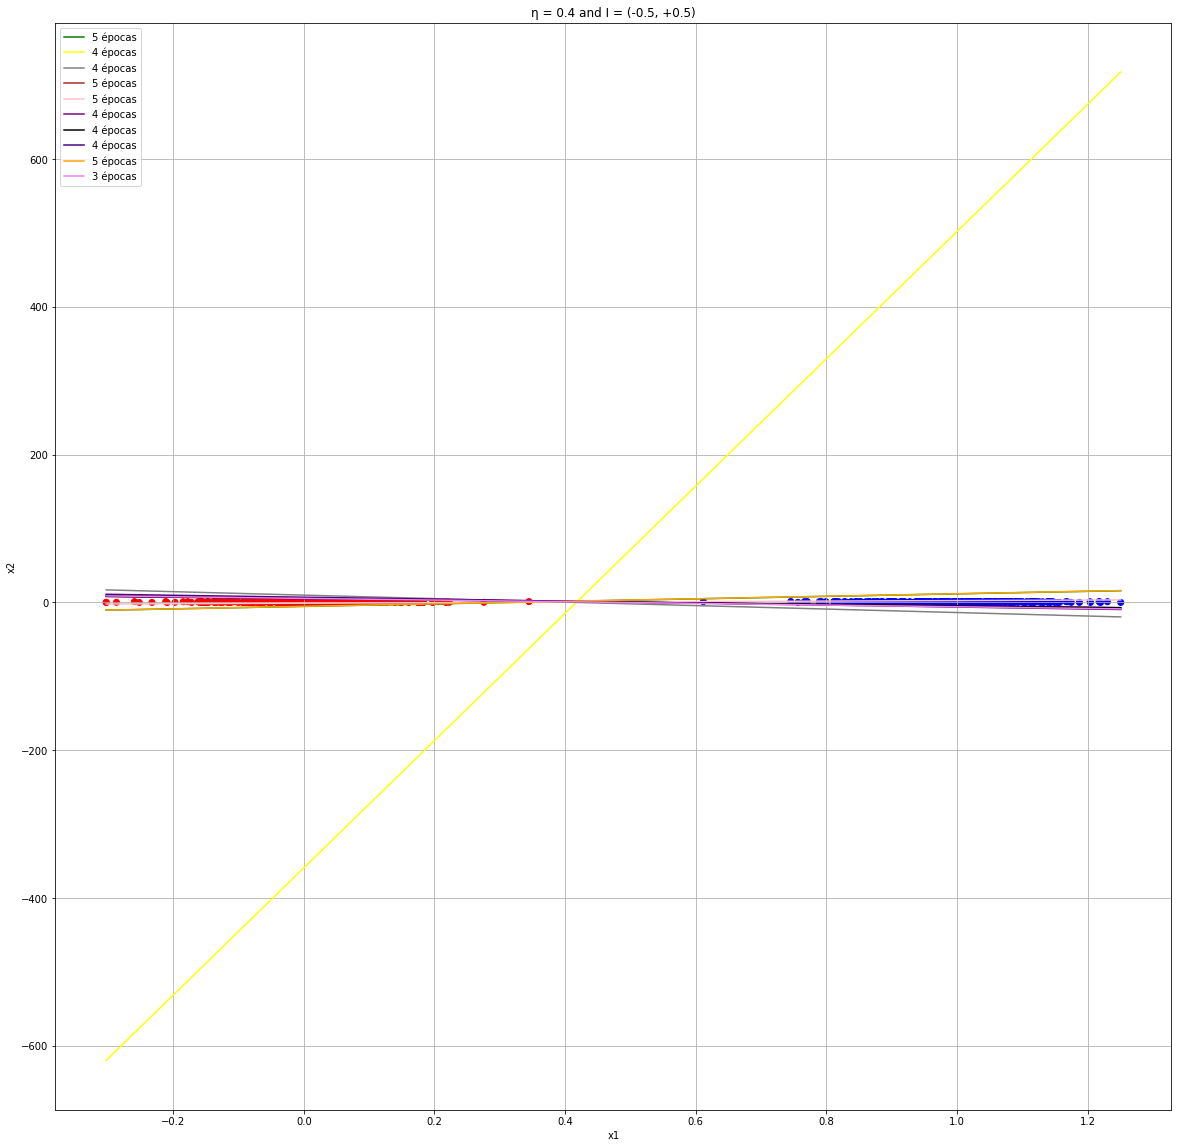

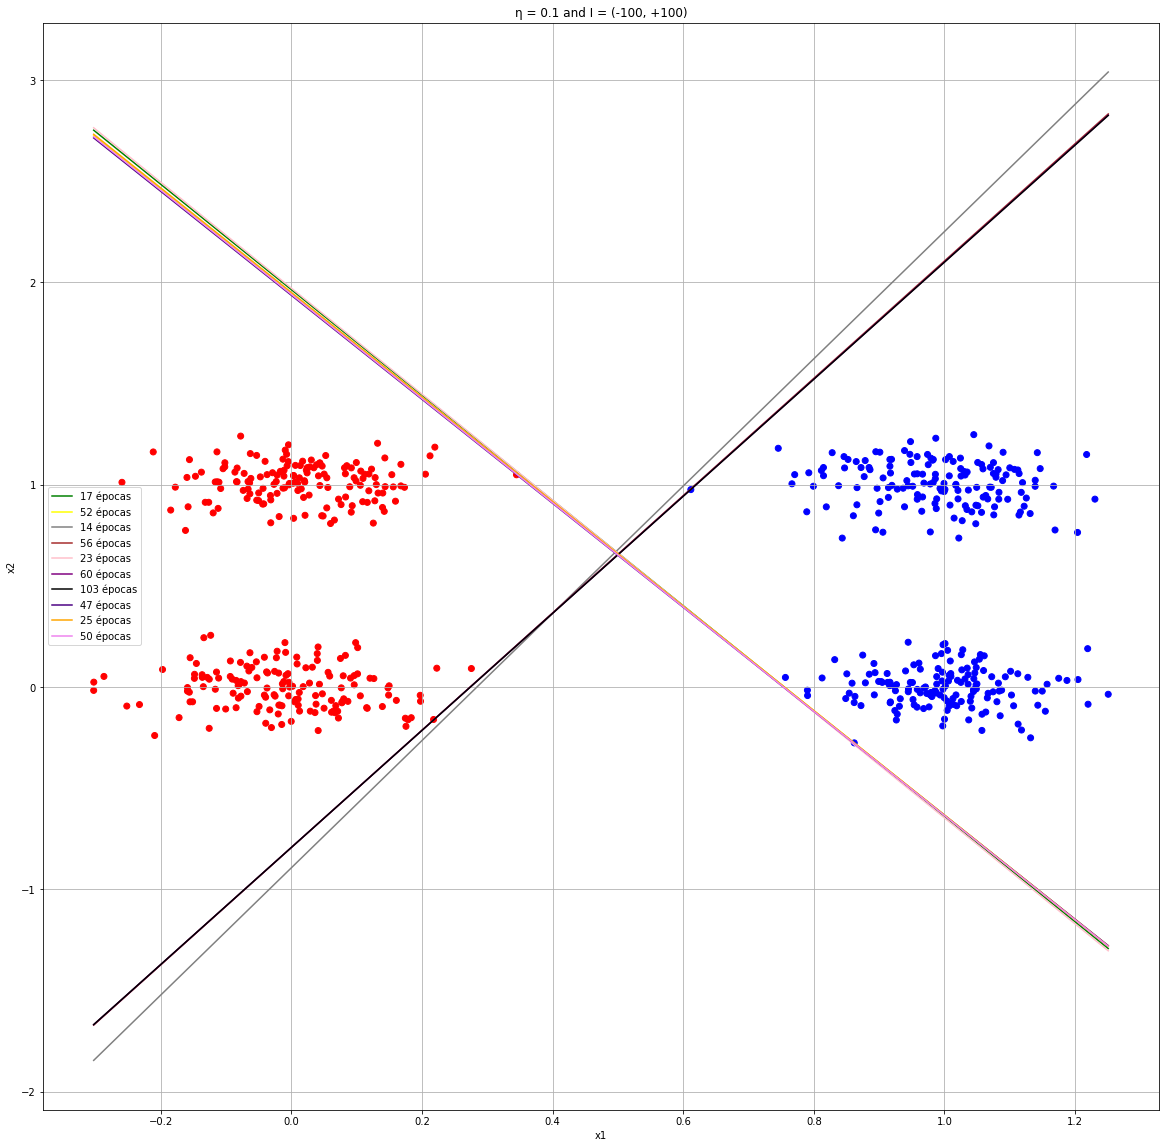

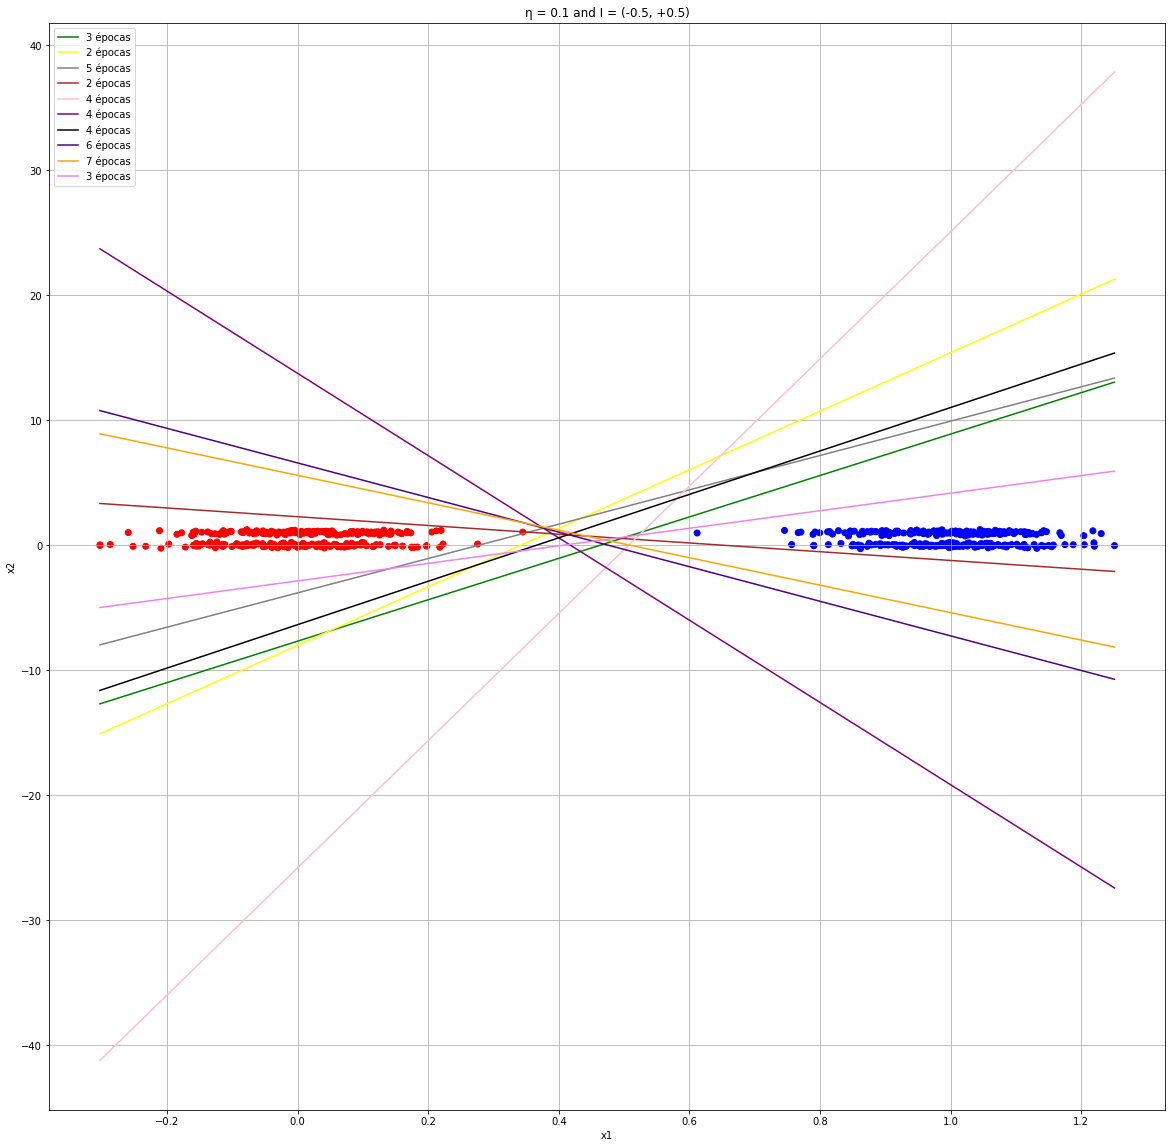

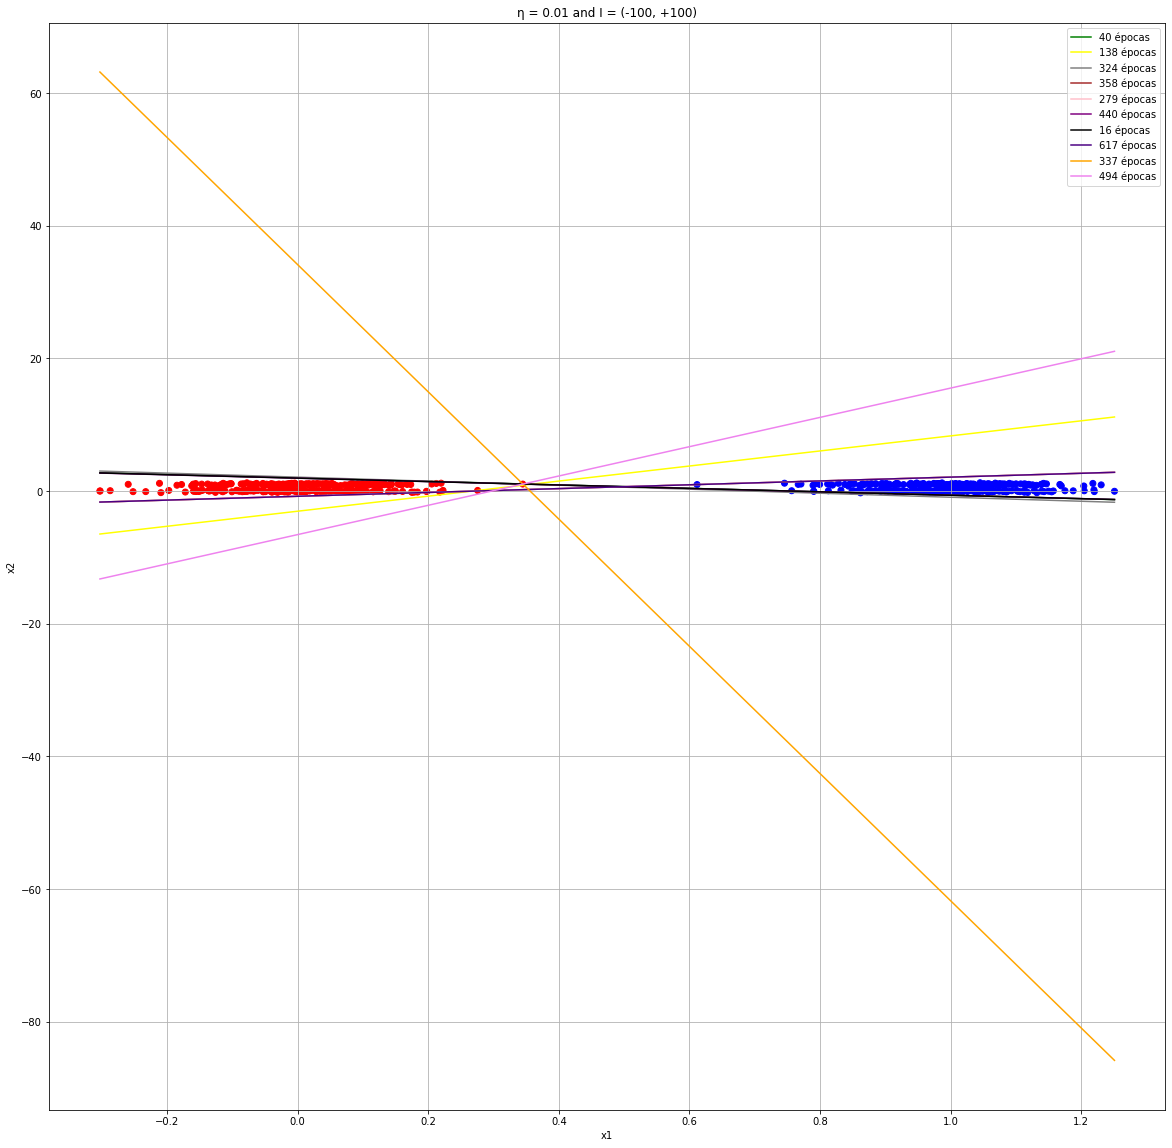

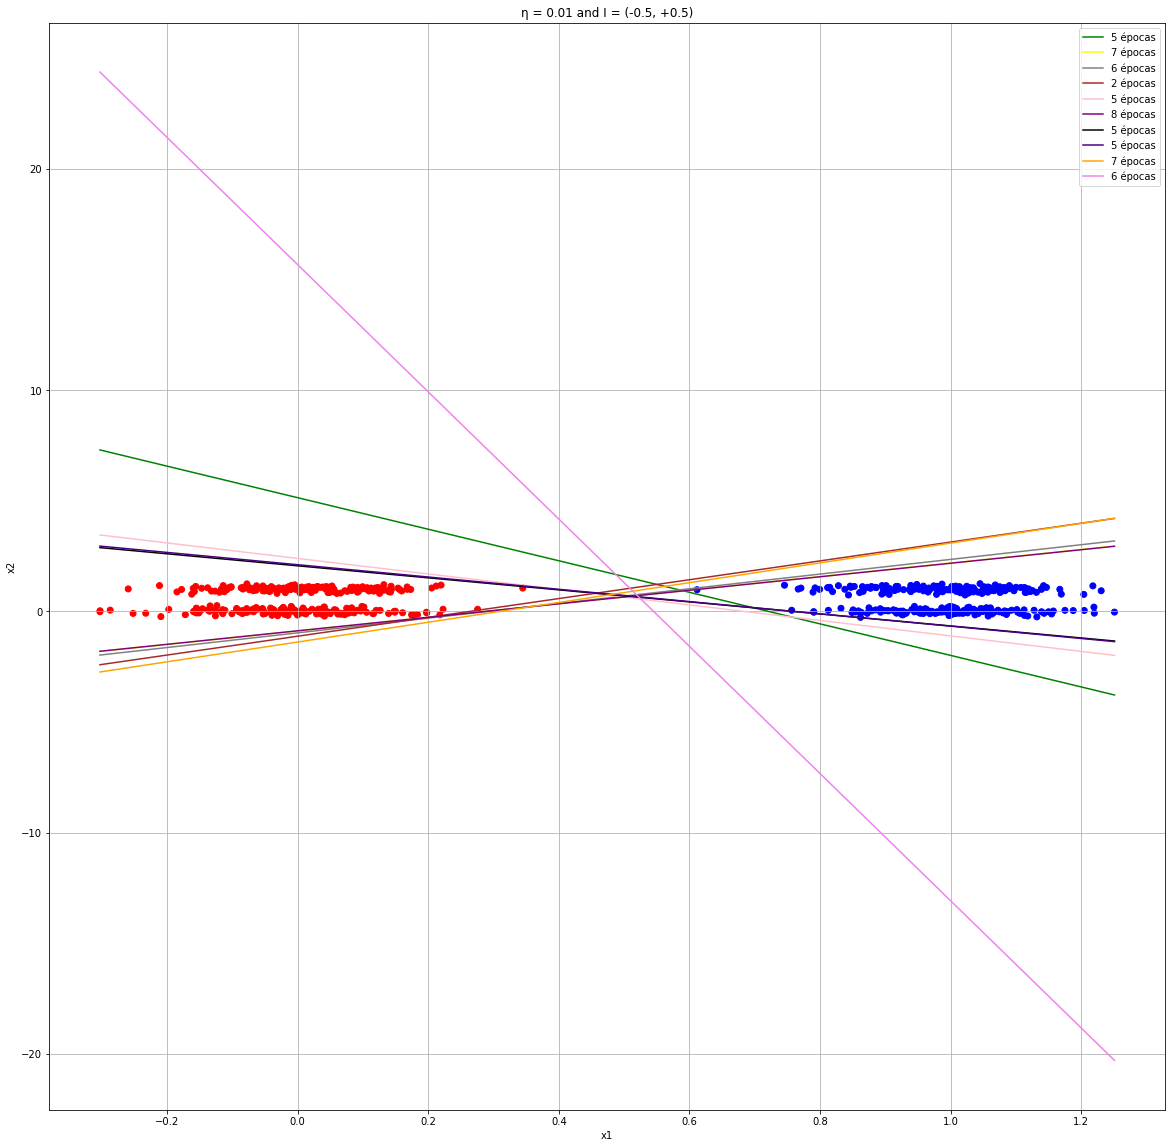



+---------------------+--------------------+-----------------------+------------------------------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Quantidade de Ajustes | Menor número de épocas para convergência |
+---------------------+--------------------+-----------------------+------------------------------------------+
|       η = 0.4       |    (-100, +100)    |     36.40 ± 66.76     |                    7                     |
|       η = 0.4       |    (-0.5, +0.5)    |      1.79 ± 1.29      |                    3                     |
|       η = 0.1       |    (-100, +100)    |     23.81 ± 65.16     |                    14                    |
|       η = 0.1       |    (-0.5, +0.5)    |      2.45 ± 2.07      |                    2                     |
|       η = 0.01      |    (-100, +100)    |     21.87 ± 65.55     |                    16                    |
|       η = 0.01      |    (-0.5, +0.5)    |      9.93 ± 14.21     |                    2             

In [112]:
# Valores de taxa de aprendizado e intervalos de inicialização uniforme aleatoria dos pesos 
n = [0.4, 0.1, 0.01]
I = [(-100, 100), (-0.5, 0.5)]

# Inicializando a tabela com as colunas esperadas
table = PrettyTable()
table.field_names = ["Taxa de Aprendizado", "Intervalo de Pesos", "Quantidade de Ajustes", "Menor número de épocas para convergência"]

# Inicializando valores de min e max para criação das retas solução e o vetor de cores para legendar as retas
min_ = x1.min()
max_ = x1.max()
label_colors = ['green', 'yellow', 'gray', 'brown', 'pink', 'purple', 'black', 'indigo', 'orange', 'violet']

# Para cada η -> Para cada I -> Rodar o treinamento 10 vezes e printar o grafico de dados junto das retas soluções
for ni in n:
    for Ii in I:
        epochs_list = []
        widget_updates_list = []

        plt.figure(figsize=(20, 20))
        plt.scatter(x1, x2, c=colors)

        for i in range(10):
            # Treino e atualização das listas de épocas e quantidades de atualizações de pesos
            p = Perceptron(learning_rate=ni, minI=Ii[0], maxI=Ii[1])
            weights, bias, epochs, weight_updates = p.train_neuron(X, yd)
            epochs_list.append(epochs)
            widget_updates_list.extend(weight_updates)

            # Variáveis para os gráficos
            slope = - weights[0] / weights[1]
            x2cut = -bias / weights[1]

            a = [min_, max_]
            b = [slope * min_ + x2cut, slope * max_ + x2cut]

            plt.plot(a, b, color=label_colors[i], label=f'{epochs} época(s)')

            plt.title(f'η = {ni} and I = (-{-Ii[0]}, +{Ii[1]})')
            plt.xlabel('x1')
            plt.ylabel('x2')

        # Mostrando o gráfico
        plt.grid(True)
        plt.legend()
        plt.show()
        print()

        # Cálculo de média e desvio padrão das atualizações de pesos
        average = np.average(widget_updates_list)
        std = np.std(widget_updates_list)
        min_conv_epoch = np.array(epochs_list).min()

        # Adicionando dados na tabela
        table.add_row([f'η = {ni}', f'(-{-Ii[0]}, +{Ii[1]})', f'{average:.2f} ± {std:.2f}', min_conv_epoch])

# Printando a tabela com os dados para todas as combinações de η e I
print() 
print(table)

In [82]:
# Lendo dados para tarefa 3
data = np.fromfile('dataHoldout.txt')

In [83]:
# Dividindo a entra em 3 variáveis x1, x2 e yd respectivamente. Foi criado o data frame df para facilitar o uso durante os processamento
x1, x2, yd = data[::3], data[1::3], data[2::3]
df = pd.DataFrame({'x1': x1, 'x2': x2, 'yd': yd})

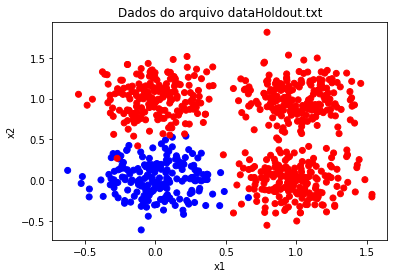

In [84]:
# Plotando os pontos da base de dados no gráfico. Observa-se que o problema não é linearmente separável.
colors = ['blue' if item else 'red' for item in yd]
plt.scatter(x1, x2, c=colors)
plt.title('Dados do arquivo dataHoldout.txt')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [93]:
# Função de divisão da base em treino e teste, dado que não é permitido utilizar os métodos da biblioteca sklearn
def train_test_split(df):
    shuffle_df = df.sample(frac=1)

    train_size = int(0.7 * len(df))

    X_train, y_train = shuffle_df[:train_size][['x1', 'x2']], shuffle_df[:train_size][['yd']]
    X_test, y_test = shuffle_df[train_size:][['x1', 'x2']], shuffle_df[train_size:][['yd']]

    return X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy(), shuffle_df

X_train, X_test, y_train, y_test, shuffle_df = train_test_split(df)

In [94]:
# Inicialização e treino (por 100 épocas) do perceptron
p = Perceptron(learning_rate=0.1, minI=-0.5, maxI=0.5, epochs=100)
weights, bias, epochs, weight_updates = p.train_neuron(X_train, y_train)

In [95]:
# Calculando a saida predita pelo modelo treinado
y_pred = p.predict(X_test)

In [96]:
# Printando resultados de precisão, revocação e f1-score
precision, recall, f1, _= precision_recall_fscore_support(y_test, y_pred)
print(f'Precisão: {precision[0] * 100:.2f} %')
print(f'Revocação: {recall[0] * 100:.2f} %')
print(f'f1-score: {f1[0]:.2f}')

Precisão: 54.79 %
Revocação: 45.98 %
f1-score: 0.50


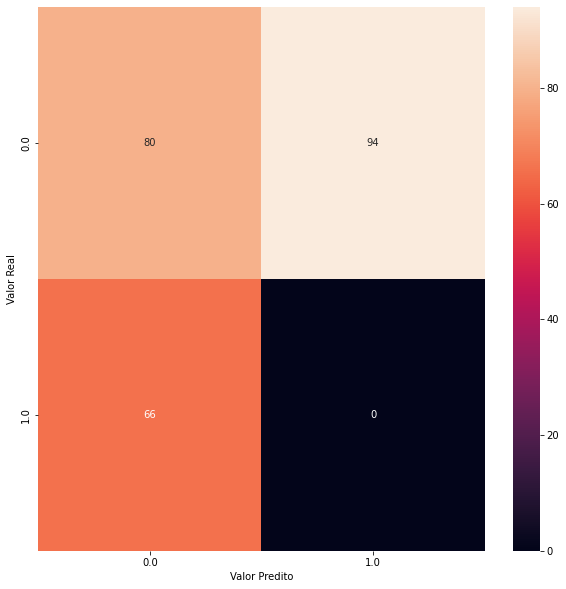

In [97]:
# Gerando a matrix de confusão sem o uso da biblioteca sklearn
def confusion_matrix(y_test, y_pred):
    conf_matrix = pd.DataFrame(np.zeros((2, 2),dtype=int), index=[0.0, 1.0], columns=[0.0, 1.0])

    for true_label, prediction in zip(y_test, y_pred):
        conf_matrix.loc[true_label, prediction] += 1

    return conf_matrix.values

conf_mat = confusion_matrix(y_test, y_pred)
fig_1, ax_1 = plt.subplots(figsize=(10,10))

sn.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=[0.0, 1.0], yticklabels=[0.0, 1.0])

plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.show()

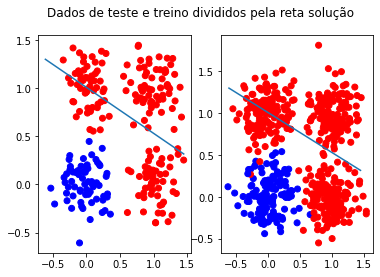

In [98]:
# Plotando gráfico com os dados de teste / treino divididos pela reta da melhor solução
slope = - weights[0] / weights[1]
x2cut = -bias / weights[1]

min_ = X_test[:,1].min()
max_ = X_test[:,1].max()

a = [min_, max_]
b = [slope*min_+x2cut, slope*max_+x2cut]

fig, axs = plt.subplots(1, 2)

test_data_plot_colors = ['blue' if item else 'red' for item in y_test]
train_data_plot_colors = ['blue' if item else 'red' for item in y_train]
fig.suptitle('Dados de teste e treino divididos pela reta solução')
axs[0].scatter(X_test[:,0], X_test[:,1], c=test_data_plot_colors)
axs[1].scatter(X_train[:,0], X_train[:,1], c=train_data_plot_colors)
axs[0].plot(a, b)
axs[1].plot(a, b)
plt.show()

Conclusão da atividade 3:
Pela análise da matriz de confusão dos dados de teste e os números de precisão, revocação e f1-score intermediários, vemos que nem para dados classificados como positivos e nem para negativos o modelo alcançou resultados minimamente satisfatório. De forma geral, o modelo apresenta dados tão confiáveis quanto jogar uma moeda para ver se o lado escolhido foi cara ou coroa.